In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import glob
import LE3_GC_ProductReader as pr
import pandas

In [2]:
def xi(xml_file,name):
    for file in xml_file:
        Product_TwoPoint = pr.DpdLE3GCReader()
        Product_TwoPoint.parse_xml(file)
        Product_TwoPoint.read_tables()
        file_name=Product_TwoPoint.CorrelationMultipole.header['D_NAME'].removesuffix('.fits')

        bin2num=Product_TwoPoint.Pairs.header["BIN2NUM"]
        bin1num=Product_TwoPoint.Pairs.header["BIN1NUM"]

        
        pair_DD=Product_TwoPoint.Pairs.header["PAIR_DD"]
        pair_RR=Product_TwoPoint.Pairs.header["PAIR_RR"]
        pair_DR=Product_TwoPoint.Pairs.header["PAIR_DR"]

        DD = np.reshape(Product_TwoPoint.Pairs.table["DD"], newshape=(bin1num,bin2num))
        DR = np.reshape(Product_TwoPoint.Pairs.table["DR"], newshape=(bin1num,bin2num))
        RR = np.reshape(Product_TwoPoint.Pairs.table["RR"], newshape=(bin1num,bin2num))

        r_name = Product_TwoPoint.CorrelationMultipole.table['SCALE']
        mu = np.array(Product_TwoPoint.Correlation.table['SCALE_2D']).reshape(bin1num, bin2num)
        xi2D = np.array(Product_TwoPoint.Correlation.table['XI']).reshape(bin1num,bin2num)
        xi0_name = Product_TwoPoint.CorrelationMultipole.table['XI0']      
        xi2 = Product_TwoPoint.CorrelationMultipole.table['XI2']
        xi4 = Product_TwoPoint.CorrelationMultipole.table['XI4']
        #err_mon = mtl.compute_xi_l_RMS(DD,DR,RR,pair_DD,pair_DR,pair_RR,mu,0)
        #err_quad = mtl.compute_xi_l_RMS(DD,DR,RR,pair_DD,pair_DR,pair_RR,mu,2)

        plt.figure()

        #plt.plot(r,xi0, label = r"$ \xi_{0}$ "+file_name)
        plt.plot(r_name, r_name**2*xi0_name, label = r"$r^2 \xi_{0}$ "+file_name + name)
        #plt.fill_between(r, r**2*(xi0-err_mon), r**2*(xi0+err_mon), alpha=0.3)
        plt.legend()
        plt.ylabel(r'$r^2\xi_0$')
        #plt.ylabel(r'$\xi_0$')
        plt.xlabel(r'$r \ [Mpc/h]$')
        plt.title(file_name)
        #plt.savefig(file_name+'.pdf')
    return r_name,xi0_name, RR, pair_RR

# South Catalog at low redshifts

no weights

['/farmdisk1/lentini/Work/Project/xi/BOSS_South/low/EUC_LE3_GCL_2PCF_BOSS_SOUTH_low_none_Correlation_AUTO_2DPOL_809DB0C6504B_20240706T105737.0Z.xml']


ValueError: too many values to unpack (expected 2)

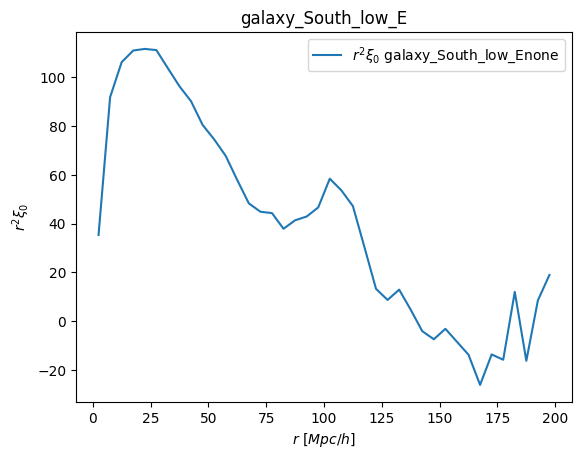

In [3]:
pathname = '/farmdisk1/lentini/Work/Project/xi/BOSS_South/low/EUC_LE3_GCL_2PCF_BOSS_SOUTH_low_none_Correlation_AUTO_2DPOL_809DB0C6504B_20240706T105737.0Z.xml'
xml_file = glob.glob(pathname)

print(xml_file)

r_none_low,xi0_none_low = xi(xml_file,'none')

cp weights

['/farmdisk1/lentini/Work/Project/xi/BOSS_South/low/EUC_LE3_GCL_2PCF_BOSS_SOUTH_low_wcp_Correlation_AUTO_2DPOL_ACCBBECF82CA_20240706T110728.0Z.xml']


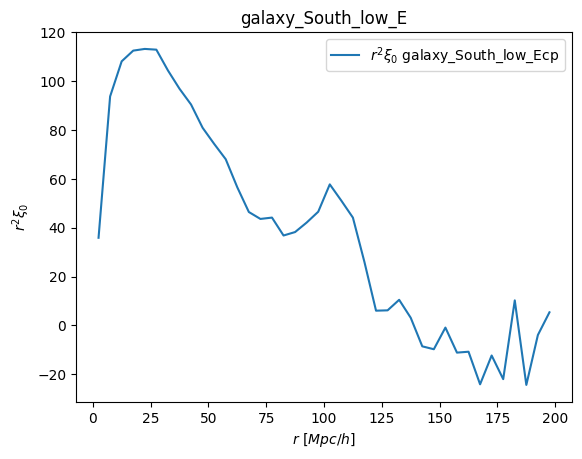

In [ ]:
pathname = '/farmdisk1/lentini/Work/Project/xi/BOSS_South/low/EUC_LE3_GCL_2PCF_BOSS_SOUTH_low_wcp_Correlation_AUTO_2DPOL_ACCBBECF82CA_20240706T110728.0Z.xml'
xml_file = glob.glob(pathname)

print(xml_file)

r_cp_low,xi0_cp_low = xi(xml_file,'cp')

z weights: $(w_{cp}+w_{oz}-1)$

['/farmdisk1/lentini/Work/Project/xi/BOSS_South/low/EUC_LE3_GCL_2PCF_BOSS_SOUTH_low_wz_Correlation_AUTO_2DPOL_0489CD528EE3_20240706T111323.0Z.xml']


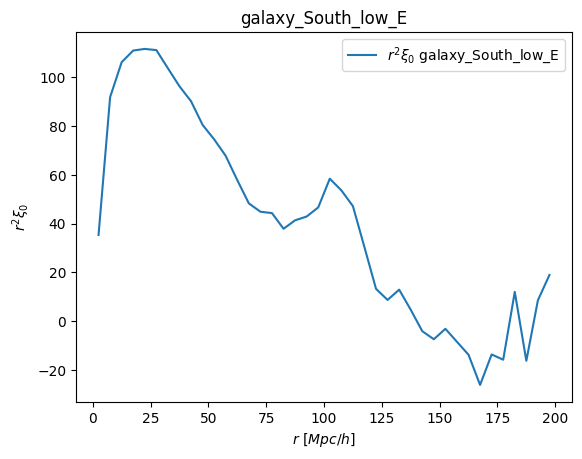

In [ ]:
pathname = '/farmdisk1/lentini/Work/Project/xi/BOSS_South/low/EUC_LE3_GCL_2PCF_BOSS_SOUTH_low_wz_Correlation_AUTO_2DPOL_0489CD528EE3_20240706T111323.0Z.xml'
xml_file = glob.glob(pathname)

print(xml_file)
r_z_low,xi0_z_low = xi(xml_file,'')

z and star weights: z and star weights: $w_{star}(w_{cp}+w_{oz}-1)$

['/farmdisk1/lentini/Work/Project/xi/BOSS_South/low/EUC_LE3_GCL_2PCF_BOSS_SOUTH_low_wstar_Correlation_AUTO_2DPOL_02972196976E_20240706T111836.0Z.xml']


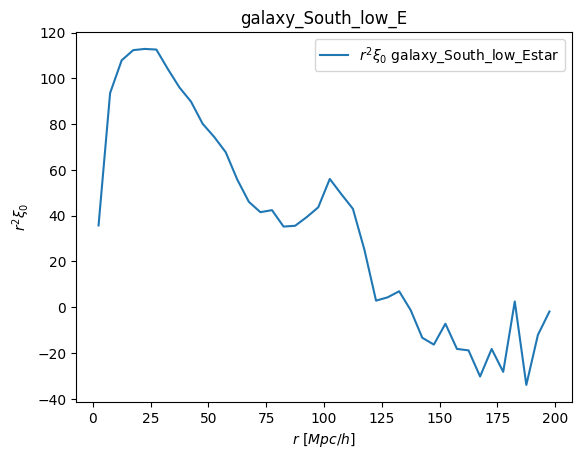

In [ ]:
pathname = '/farmdisk1/lentini/Work/Project/xi/BOSS_South/low/EUC_LE3_GCL_2PCF_BOSS_SOUTH_low_wstar_Correlation_AUTO_2DPOL_02972196976E_20240706T111836.0Z.xml'
xml_file = glob.glob(pathname)

print(xml_file)

r_star_low,xi0_star_low = xi(xml_file,'star')

sys weights: $w_{sys}(w_{cp}+w_{oz}-1)$ 

['/farmdisk1/lentini/Work/Project/xi/BOSS_South/low/EUC_LE3_GCL_2PCF_BOSS_SOUTH_low_wtot_Correlation_AUTO_2DPOL_9C307997DB7E_20240706T112231.0Z.xml']


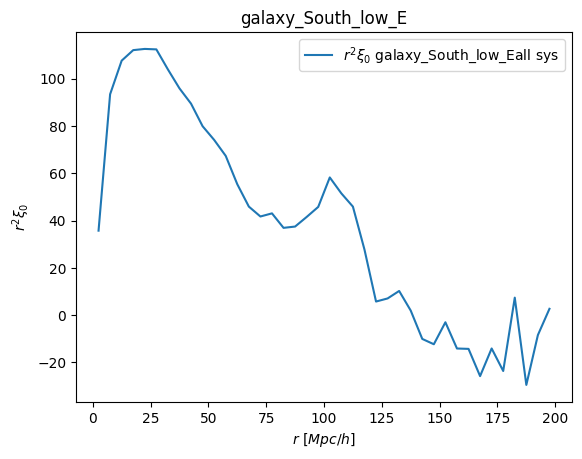

In [ ]:
pathname = '/farmdisk1/lentini/Work/Project/xi/BOSS_South/low/EUC_LE3_GCL_2PCF_BOSS_SOUTH_low_wtot_Correlation_AUTO_2DPOL_9C307997DB7E_20240706T112231.0Z.xml'
xml_file = glob.glob(pathname)

print(xml_file)

r_sys_low,xi0_sys_low = xi(xml_file,'all sys')

all weights: $w_{sys}w_{fkp}(w_{cp}+w_{oz}-1)$

['/farmdisk1/lentini/Work/Project/xi/BOSS_South/low/EUC_LE3_GCL_2PCF_BOSS_SOUTH_low_totfkp_Correlation_AUTO_2DPOL_7D4740367B95_20240715T115701.0Z.xml']


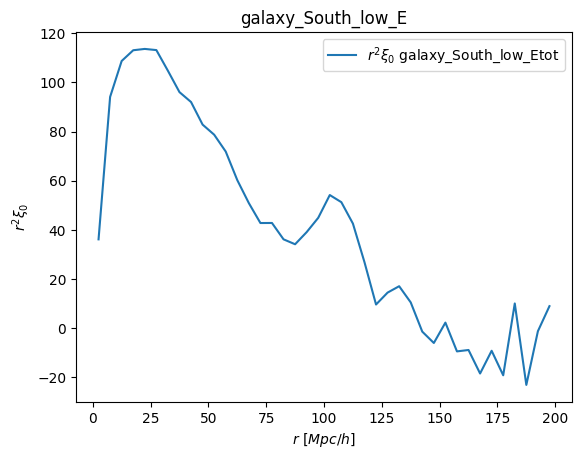

In [ ]:
pathname = '/farmdisk1/lentini/Work/Project/xi/BOSS_South/low/EUC_LE3_GCL_2PCF_BOSS_SOUTH_low_totfkp_Correlation_AUTO_2DPOL_7D4740367B95_20240715T115701.0Z.xml'
xml_file = glob.glob(pathname)

print(xml_file)

r_tot_low,xi0_tot_low = xi(xml_file,'tot')

Text(0.5, 0, 'r')

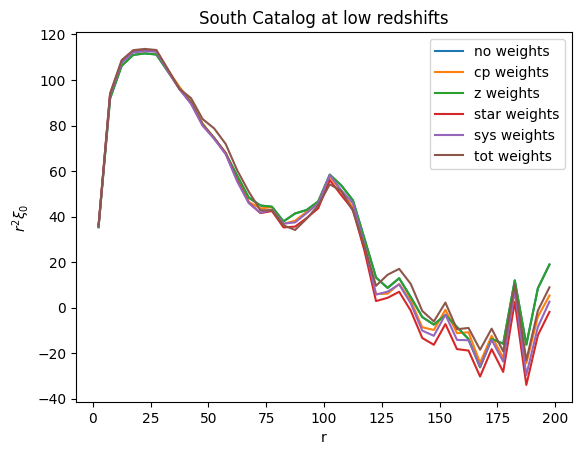

In [ ]:
plt.plot(r_none_low, r_none_low**2*xi0_none_low, label = 'no weights')
plt.plot(r_cp_low, r_cp_low**2*xi0_cp_low, label = 'cp weights')
plt.plot(r_z_low, r_z_low**2*xi0_z_low, label = 'z weights')
plt.plot(r_star_low, r_star_low**2*xi0_star_low, label = 'star weights')
plt.plot(r_sys_low, r_sys_low**2*xi0_sys_low, label = 'sys weights')
plt.plot(r_tot_low, r_tot_low**2*xi0_tot_low, label = 'tot weights')
plt.legend()
plt.title('South Catalog at low redshifts')
plt.ylabel(r'$r^2 \xi_{0}$ ')
plt.xlabel('r')

# South Catalog at high redshifts

No weights

['/farmdisk1/lentini/Work/Project/xi/BOSS_South/high/EUC_LE3_GCL_2PCF_BOSS_SOUTH_high_none_Correlation_AUTO_2DPOL_63ADBD4FCB74_20240706T101503.0Z.xml']


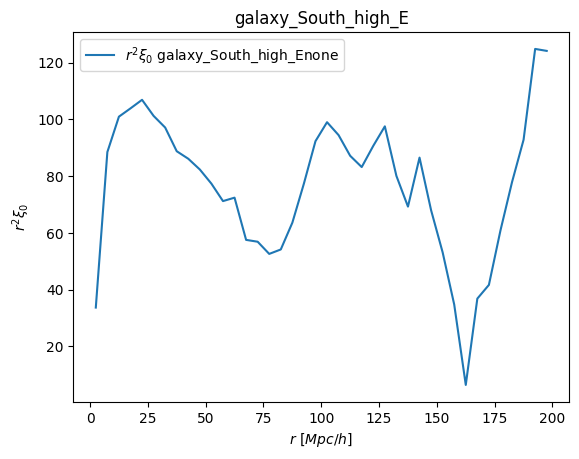

In [ ]:
pathname = '/farmdisk1/lentini/Work/Project/xi/BOSS_South/high/EUC_LE3_GCL_2PCF_BOSS_SOUTH_high_none_Correlation_AUTO_2DPOL_63ADBD4FCB74_20240706T101503.0Z.xml'

xml_file= glob.glob(pathname)

print(xml_file)

r_none_high,xi0_none_high = xi(xml_file,'none')

cp weights

['/farmdisk1/lentini/Work/Project/xi/BOSS_South/high/EUC_LE3_GCL_2PCF_BOSS_SOUTH_high_wcp_Correlation_AUTO_2DPOL_E295F8014DA1_20240706T102432.0Z.xml']


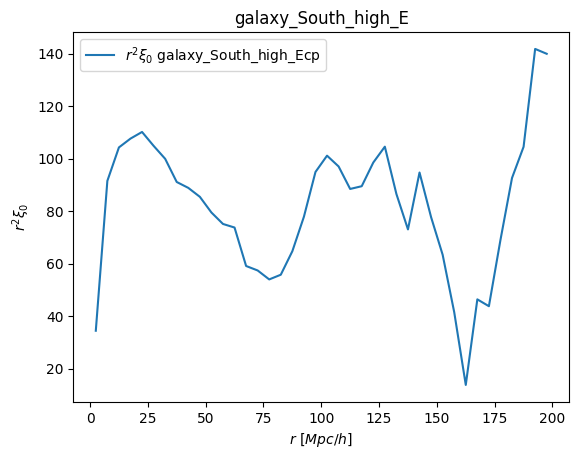

In [ ]:
pathname = '/farmdisk1/lentini/Work/Project/xi/BOSS_South/high/EUC_LE3_GCL_2PCF_BOSS_SOUTH_high_wcp_Correlation_AUTO_2DPOL_E295F8014DA1_20240706T102432.0Z.xml'
xml_file = glob.glob(pathname)

print(xml_file)

r_cp_high,xi0_cp_high = xi(xml_file,'cp')

z weights



['/farmdisk1/lentini/Work/Project/xi/BOSS_South/high/EUC_LE3_GCL_2PCF_BOSS_SOUTH_high_wz_Correlation_AUTO_2DPOL_1E1C6254348D_20240706T103049.0Z.xml']


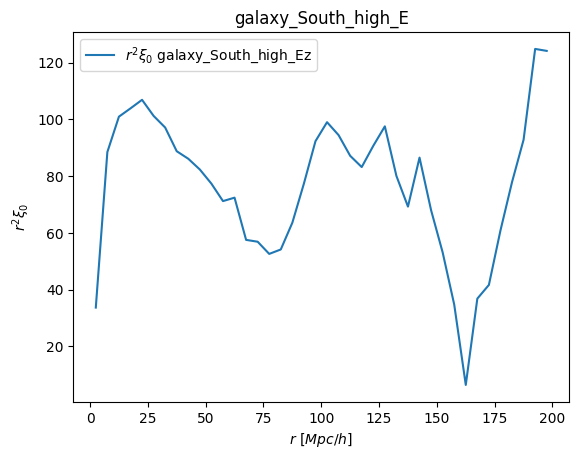

In [ ]:
pathname = '/farmdisk1/lentini/Work/Project/xi/BOSS_South/high/EUC_LE3_GCL_2PCF_BOSS_SOUTH_high_wz_Correlation_AUTO_2DPOL_1E1C6254348D_20240706T103049.0Z.xml'
xml_file = glob.glob(pathname)

print(xml_file)

r_z_high,xi0_z_high = xi(xml_file,'z')

z and star weight

['/farmdisk1/lentini/Work/Project/xi/BOSS_South/high/EUC_LE3_GCL_2PCF_BOSS_SOUTH_high_wstar_Correlation_AUTO_2DPOL_8AA311ED33CE_20240706T103706.0Z.xml']


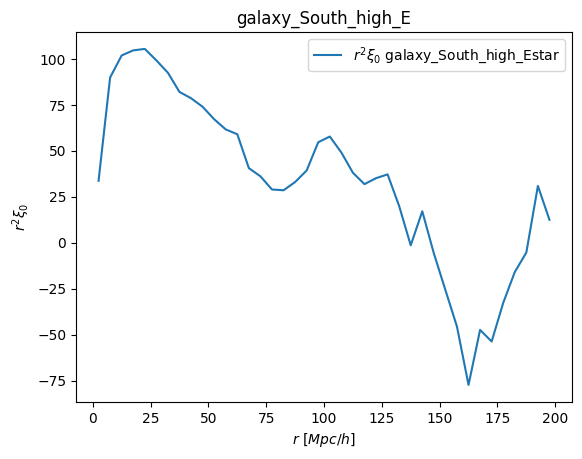

In [ ]:
pathname = '/farmdisk1/lentini/Work/Project/xi/BOSS_South/high/EUC_LE3_GCL_2PCF_BOSS_SOUTH_high_wstar_Correlation_AUTO_2DPOL_8AA311ED33CE_20240706T103706.0Z.xml'
xml_file = glob.glob(pathname)

print(xml_file)

r_star_high,xi0_star_high = xi(xml_file,'star')

sys weights

['/farmdisk1/lentini/Work/Project/xi/BOSS_South/high/EUC_LE3_GCL_2PCF_BOSS_SOUTH_high_wtot_Correlation_AUTO_2DPOL_A561BE8B0EE9_20240706T104718.0Z.xml']


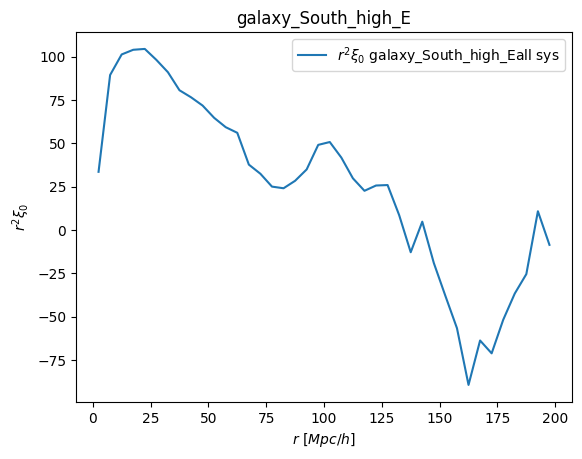

In [ ]:
pathname = '/farmdisk1/lentini/Work/Project/xi/BOSS_South/high/EUC_LE3_GCL_2PCF_BOSS_SOUTH_high_wtot_Correlation_AUTO_2DPOL_A561BE8B0EE9_20240706T104718.0Z.xml'
xml_file = glob.glob(pathname)

print(xml_file)

r_sys_high,xi0_sys_high = xi(xml_file,'all sys')

all weights

['/farmdisk1/lentini/Work/Project/xi/BOSS_South/high/EUC_LE3_GCL_2PCF_BOSS_SOUTH_high_totfkp_Correlation_AUTO_2DPOL_5A8851860C82_20240715T115530.0Z.xml']


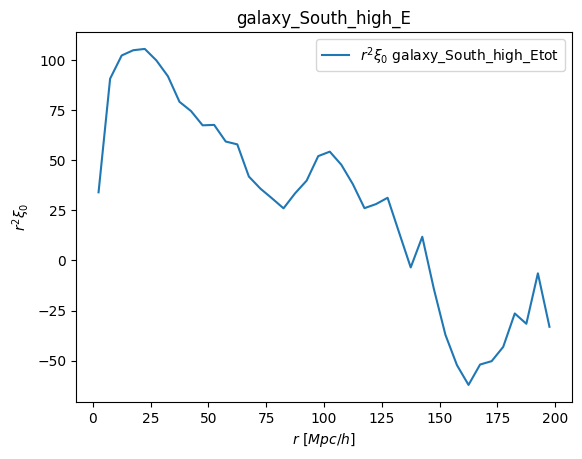

In [ ]:
pathname = '/farmdisk1/lentini/Work/Project/xi/BOSS_South/high/EUC_LE3_GCL_2PCF_BOSS_SOUTH_high_totfkp_Correlation_AUTO_2DPOL_5A8851860C82_20240715T115530.0Z.xml'
xml_file = glob.glob(pathname)

print(xml_file)

r_tot_high,xi0_tot_high = xi(xml_file,'tot')

Text(0.5, 0, 'r')

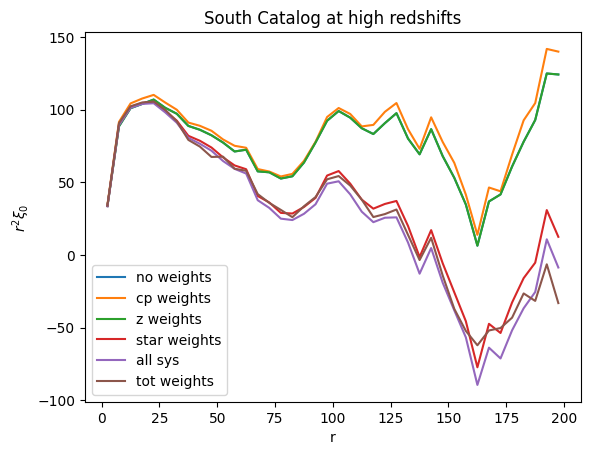

In [ ]:
plt.plot(r_none_high, r_none_high**2*xi0_none_high, label = 'no weights')
plt.plot(r_cp_high, r_cp_high**2*xi0_cp_high, label = 'cp weights')
plt.plot(r_z_high, r_z_high**2*xi0_z_high, label = 'z weights')
plt.plot(r_star_high, r_star_high**2*xi0_star_high, label = 'star weights')
plt.plot(r_sys_high, r_sys_high**2*xi0_sys_high, label = 'all sys')
plt.plot(r_tot_high, r_tot_high**2*xi0_tot_high, label = 'tot weights')
plt.legend()
plt.title('South Catalog at high redshifts')
plt.ylabel(r'$r^2 \xi_{0}$ ')
plt.xlabel('r')

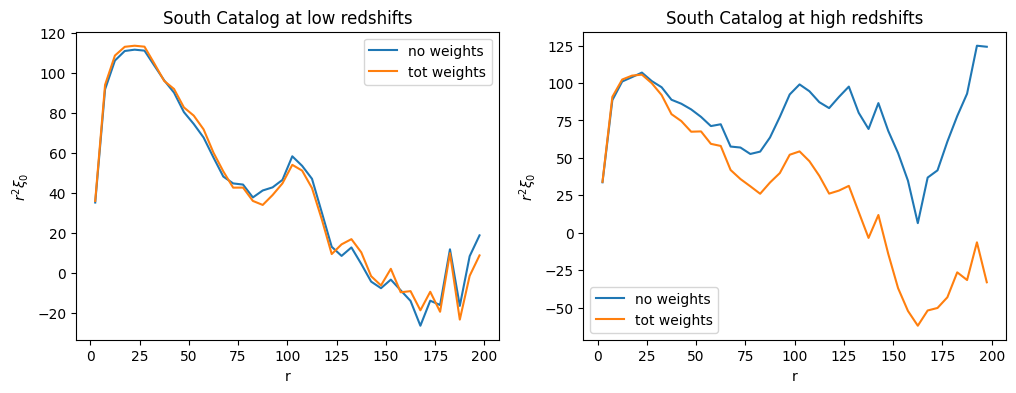

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
ax[0].plot(r_none_low, r_none_low**2*xi0_none_low, label = 'no weights')
ax[0].plot(r_tot_low, r_tot_low**2*xi0_tot_low, label = 'tot weights')
ax[0].set_title('South Catalog at low redshifts')
ax[0].set_xlabel('r')
ax[0].set_ylabel(r'$r^2 \xi_{0}$ ')
ax[0].legend()
ax[1].plot(r_none_high, r_none_high**2*xi0_none_high, label = 'no weights')
ax[1].plot(r_tot_high, r_tot_high**2*xi0_tot_high, label = 'tot weights')
ax[1].set_title('South Catalog at high redshifts')
ax[1].set_xlabel('r')
ax[1].set_ylabel(r'$r^2 \xi_{0}$ ')
ax[1].legend()
